Accuracy: 0.575
Confusion Matrix:
 [[ 9  8]
 [ 9 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51        17
           1       0.64      0.61      0.62        23

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.58      0.57      0.58        40



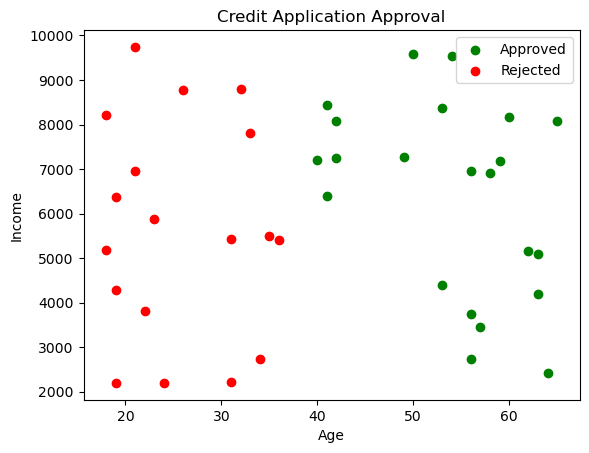

Prediction: Rejected


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Step 1: Generate Random Data
np.random.seed(0)  # For reproducibility
n_samples = 200
age = np.random.randint(18, 66, size=n_samples)
income = np.random.randint(2000, 10001, size=n_samples)
approval_status = np.random.choice([0, 1], size=n_samples)

# Step 2: Split Data into Training and Testing Sets
X = np.column_stack((age, income))
X_train, X_test, y_train, y_test = train_test_split(X, approval_status, test_size=0.2, random_state=42)

# Step 3: Build and Train a Classification Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate Model Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Step 5: Visualize Results
approved = X_test[y_pred == 1]
rejected = X_test[y_pred == 0]

plt.scatter(approved[:, 0], approved[:, 1], color='green', label='Approved')
plt.scatter(rejected[:, 0], rejected[:, 1], color='red', label='Rejected')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.title("Credit Application Approval")
plt.show()

# Step 6: Save the Model and Make Predictions
joblib.dump(model, 'credit_approval_model.pkl')

# Example: Making predictions on new data
new_data = np.array([[30, 5000]])  # New data (age and income)
prediction = model.predict(new_data)
print("Prediction:", "Approved" if prediction == 1 else "Rejected")
